<a href="https://colab.research.google.com/github/valdirdpg/curso-dnc/blob/master/Exercicios_Est%C3%A1tistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para sintetizar e aplicar aquilo que foi visto durante o módulo, façam os seguintes exercícios

Nesse case, vocês terão acesso à base de dados com avaliações dos filmes da Netflix. Considerem os estudos em cima do Rating, onde queremos fazer análises estatísticas sobre essa variável.

#Estatística Descritiva

In [ ]:
import pandas as pd
import numpy as np
import random
from scipy.stats import norm
import scipy.stats as st
import seaborn as sns

In [ ]:
filmes = pd.read_csv('/content/n_movies.csv')
print(filmes.shape)
filmes.head()

(9957, 9)


,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [ ]:
#Tire as principais medidas das variáveis rating

filmes.describe()

,rating
count,8784.000000
mean,6.764515
std,1.214840
min,1.700000
25%,6.100000
50%,6.900000
75%,7.600000
max,9.900000


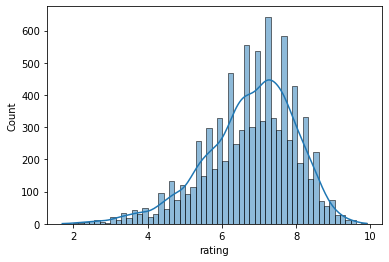

In [ ]:
#Plote o histograma e boxplot
sns.histplot(data=filmes, x="rating", kde=True);

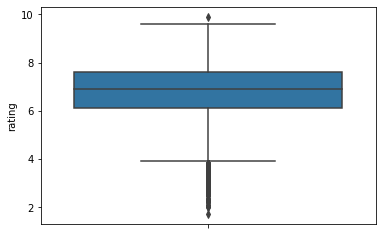

In [ ]:
#Boxplot
sns.boxplot(data=filmes, y="rating");

#Amostragem simples aleatória

In [ ]:
#Determine a quantidade ideal de elementos para esta amostra dado o tamnho do dataset

#Considere o escore_z como 1.96, desvio padrão como 0.5, margem de erro em 0.05 e extraia a quantidade da população

#Utilize a seguinte fórmula para calcular


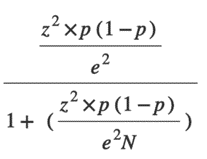

In [ ]:
filmes = filmes.dropna()
print(filmes.shape)
filmes.info()

(5754, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5754 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        5754 non-null   object 
 1   year         5754 non-null   object 
 2   certificate  5754 non-null   object 
 3   duration     5754 non-null   object 
 4   genre        5754 non-null   object 
 5   rating       5754 non-null   float64
 6   description  5754 non-null   object 
 7   stars        5754 non-null   object 
 8   votes        5754 non-null   object 
dtypes: float64(1), object(8)
memory usage: 449.5+ KB


In [ ]:
#Calcule o tamanho da amostra
z = 1.96
p = 0.5
e = 0.05
n = 5754

tamanho_amostra = ((z**2)*p*(1*p)/(e**2))/1+(((z**2)*p*(1-p))/((e**2)*n))

tamanho_amostra

384.22676399026756

## Amostragem sistemática

In [ ]:
#Amostra simple
amostra_simples = filmes.sample(385, replace = True)
amostra_simples

,title,year,certificate,duration,genre,rating,description,stars,votes
9931,Me Time,(2022),R,101 min,Comedy,5.0,Follows a dad who finds time for himself for t...,"['John Hamburg', '| ', ' Stars:', 'Kevin Ha...","26,101"
661,Deliver Us from Evil,(I) (2014),R,118 min,"Action, Adventure, Crime",6.2,New York police officer Ralph Sarchie investig...,"['Scott Derrickson', '| ', ' Stars:', 'Eric...","77,685"
4633,Dad Wanted,(2020),TV-14,102 min,"Comedy, Drama, Family",5.7,Blanca's mom stopped letting her ride her BMX ...,"['Javier Colinas, ', 'Valeria Zunzun', '| ', '...","1,095"
1457,Ride or Die,(III) (2021),TV-MA,142 min,"Drama, Romance, Thriller",5.6,Rei helps the woman she's been in love with fo...,"['Ryûichi Hiroki', '| ', ' Stars:', 'Kiko M...","1,974"
1584,Sexify,(2021– ),TV-MA,40 min,"Comedy, Drama",6.5,To build an innovative sex app and win a tech ...,"['Aleksandra Skraba, ', 'Maria Sobocinska, ', ...","5,159"
...,...,...,...,...,...,...,...,...,...
3172,Heart Parade,(2022),TV-PG,108 min,"Comedy, Romance",5.0,"A careerist from Warsaw, who does not like dog...","['Filip Zylber', '| ', ' Stars:', 'Anna Pró...",570
1772,Remarriage & Desires,(2022– ),TV-14,70 min,Drama,7.4,"Through an exclusive matchmaking agency, women...","['Kim Hee-seon, ', 'Hyun-Wook Lee, ', 'Ji-Yeon...","1,061"
8136,Avatar: The Last Airbender,(2005–2008),TV-Y7,25 min,"Animation, Action, Adventure",8.1,"On their way to Omashu, Team Avatar is forced ...","['Lauren MacMullan', '| ', ' Stars:', 'Zach...","3,690"
1665,Marauders,(2016),R,107 min,"Action, Crime, Thriller",5.5,"When a bank is hit by a brutal heist, all evid...","['Steven C. Miller', '| ', ' Stars:', 'Bruc...","22,443"


In [ ]:
  # Faça uma Funçao para definir a amostragem sistemática para saltar de 5 em 5
def amostragem_sistematica(df, step):
    indexes = np.arange(5,len(df), step=step)
    amostragem_sistematica = df.iloc[indexes]
    return amostragem_sistematica

#Visualizar a minha função
amostra_sistematica = amostragem_sistematica(filmes, 5)
amostra_sistematica.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
5,The Sandman,(2022– ),TV-MA,45 min,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...","116,358"
10,Stranger Things,(2016– ),TV-14,51 min,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...","['Millie Bobby Brown, ', 'Finn Wolfhard, ', 'W...","1,149,889"
15,I Came By,(2022),TV-MA,110 min,Thriller,6.1,Follows a young graffiti artist who discovers ...,"['Babak Anvari', '| ', ' Stars:', 'Antonio ...","16,230"
22,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,597"
27,Shameless,(2011–2021),TV-MA,46 min,"Comedy, Drama",8.6,"A scrappy, feisty, fiercely loyal Chicago fami...","['Emmy Rossum, ', 'William H. Macy, ', 'Ethan ...","239,541"


In [ ]:
indexes = np.arange(5,len(filmes), step=5)
indexes

array([   5,   10,   15, ..., 5740, 5745, 5750])

## Teorema do Limite Central

,rating
count,1150.000000
mean,6.772348
std,1.217926
min,2.100000
25%,6.000000
50%,6.900000
75%,7.600000
max,9.600000


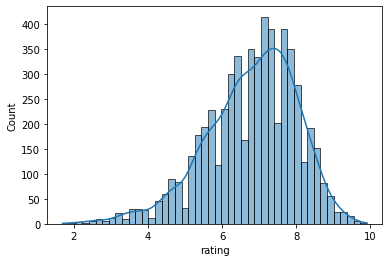

In [ ]:
# Verifico a distribuição por histograma da minha variável "Rating"
sns.histplot(data=filmes, x = "rating", kde = True);
amostra_sistematica.describe()

In [ ]:
#Transformo a coluna rating em lista
rating_values = filmes["rating"].values.tolist()
print(rating_values)


[8.5, 8.7, 8.9, 5.9, 8.6, 7.8, 9.2, 9.5, 6.3, 6.2, 8.7, 4.7, 8.1, 8.1, 6.4, 6.1, 5.8, 8.8, 8.8, 7.6, 8.4, 8.0, 7.4, 7.8, 8.9, 8.6, 8.5, 8.5, 5.9, 6.5, 5.0, 8.5, 8.5, 8.2, 8.0, 8.9, 8.1, 7.9, 8.5, 6.8, 5.3, 8.8, 8.4, 8.0, 8.2, 8.4, 8.0, 7.9, 9.0, 7.1, 7.3, 6.1, 8.7, 8.4, 9.0, 7.7, 7.4, 8.2, 8.9, 8.2, 6.3, 8.3, 7.6, 8.5, 8.6, 7.7, 8.2, 6.5, 8.5, 7.4, 8.0, 9.0, 8.8, 8.3, 7.6, 7.8, 7.5, 6.6, 8.6, 8.7, 7.6, 8.6, 8.5, 8.6, 8.1, 7.7, 6.3, 3.3, 6.6, 7.9, 7.3, 9.1, 8.7, 7.7, 8.5, 6.7, 7.8, 8.1, 8.7, 8.9, 7.5, 8.7, 8.8, 8.4, 8.2, 8.1, 8.2, 8.3, 8.4, 7.7, 7.6, 7.6, 8.1, 5.8, 8.7, 8.5, 6.9, 7.5, 8.7, 8.6, 7.4, 8.6, 7.1, 7.6, 5.4, 7.7, 7.7, 7.7, 8.7, 8.4, 7.6, 6.8, 7.3, 8.8, 7.9, 8.3, 8.6, 8.4, 7.4, 8.4, 2.7, 7.2, 8.2, 8.4, 7.6, 5.4, 8.5, 8.5, 7.7, 6.2, 8.2, 7.7, 7.2, 8.0, 8.5, 7.5, 7.8, 8.2, 7.5, 6.6, 7.3, 2.6, 7.9, 8.7, 6.3, 8.5, 8.4, 8.1, 7.4, 5.0, 8.5, 8.4, 8.7, 8.4, 7.1, 7.2, 6.8, 7.5, 8.4, 7.8, 7.5, 8.1, 8.1, 8.8, 4.7, 9.3, 8.5, 7.8, 6.7, 5.7, 7.7, 7.5, 8.1, 7.0, 8.3, 6.2, 8.3, 8.4, 7.6, 8.5,

In [ ]:
#Extraio a quantidade de amostras aleatórias com base na quantidade de amostras tiradas pelo cálculo
pop = rating_values
means = []

for i in range(385):
  sample = random.sample(pop, k=385)
  means.append(np.mean(sample))

means

[6.787792207792208,
 6.927532467532468,
 6.760519480519481,
 6.839480519480519,
 6.768571428571429,
 6.775584415584415,
 6.751428571428572,
 6.719740259740261,
 6.754805194805196,
 6.804415584415585,
 6.8059740259740265,
 6.764675324675325,
 6.795844155844156,
 6.787012987012987,
 6.774025974025974,
 6.820519480519479,
 6.816103896103896,
 6.815324675324675,
 6.755324675324676,
 6.687792207792208,
 6.717662337662338,
 6.755584415584417,
 6.826493506493506,
 6.881298701298702,
 6.7376623376623375,
 6.8355844155844165,
 6.780259740259741,
 6.707272727272728,
 6.707012987012987,
 6.706753246753248,
 6.7592207792207795,
 6.764675324675325,
 6.781298701298701,
 6.710129870129871,
 6.818181818181818,
 6.761558441558442,
 6.726233766233765,
 6.742597402597402,
 6.805714285714285,
 6.631428571428573,
 6.8412987012987,
 6.706753246753248,
 6.862077922077923,
 6.8306493506493515,
 6.778181818181819,
 6.794545454545455,
 6.764415584415585,
 6.811948051948051,
 6.79064935064935,
 6.810389610389611

In [ ]:
#Média das amostras
np.mean(means)

6.788196997807388

In [ ]:
#Média Populacional
np.mean(pop)

6.792822384428223

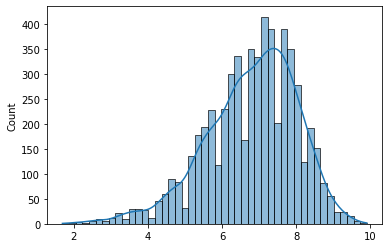

In [ ]:

sns.histplot(data = pop, kde = True);

## Intervalo de Confiança

Vamos criar um intervalo de confiança com nível de confiança 95% para o rating populacional médio. Usar a distribuição t 

In [ ]:
test_95 = st.norm.interval(alpha=0.95, loc=np.mean(means), scale = st.sem(means))
test_95

(6.7822267126818145, 6.794167282932961)